<a href="https://colab.research.google.com/github/madol-abraham/Complete-date-science-and-machine-learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Kernels Indepth Intuition And Practical Explanation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(100**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x,x])

In [5]:
y

array([ 99.87492178,  99.8799274 ,  99.88483063,  99.88963147,
        99.89432995,  99.89892607,  99.90341984,  99.9078113 ,
        99.91210044,  99.91628727,  99.92037183,  99.9243541 ,
        99.92823412,  99.93201188,  99.93568741,  99.93926071,
        99.94273179,  99.94610067,  99.94936735,  99.95253184,
        99.95559416,  99.95855431,  99.96141231,  99.96416815,
        99.96682186,  99.96937343,  99.97182288,  99.97417022,
        99.97641544,  99.97855856,  99.98059959,  99.98253852,
        99.98437537,  99.98611015,  99.98774285,  99.98927348,
        99.99070205,  99.99202856,  99.99325301,  99.99437542,
        99.99539577,  99.99631408,  99.99713035,  99.99784458,
        99.99845678,  99.99896694,  99.99937506,  99.99968115,
        99.99988522,  99.99998725,  99.99998725,  99.99988522,
        99.99968115,  99.99937506,  99.99896694,  99.99845678,
        99.99784458,  99.99713035,  99.99631408,  99.99539577,
        99.99437542,  99.99325301,  99.99202856,  99.99

In [2]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

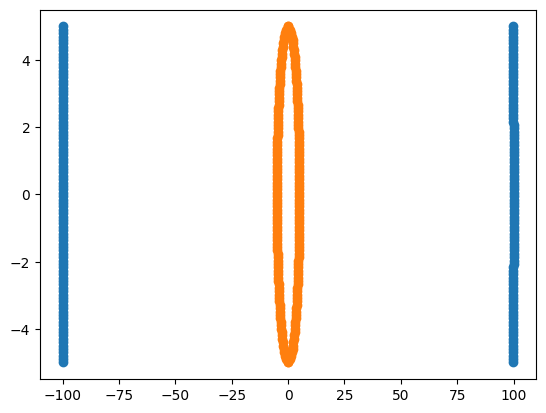

In [4]:
plt.scatter(y,x)
plt.scatter(y1, x1)

In [8]:
np.vstack([y,x]).T

array([[ 9.98749218e+01, -5.00000000e+00],
       [ 9.98799274e+01, -4.89898990e+00],
       [ 9.98848306e+01, -4.79797980e+00],
       [ 9.98896315e+01, -4.69696970e+00],
       [ 9.98943299e+01, -4.59595960e+00],
       [ 9.98989261e+01, -4.49494949e+00],
       [ 9.99034198e+01, -4.39393939e+00],
       [ 9.99078113e+01, -4.29292929e+00],
       [ 9.99121004e+01, -4.19191919e+00],
       [ 9.99162873e+01, -4.09090909e+00],
       [ 9.99203718e+01, -3.98989899e+00],
       [ 9.99243541e+01, -3.88888889e+00],
       [ 9.99282341e+01, -3.78787879e+00],
       [ 9.99320119e+01, -3.68686869e+00],
       [ 9.99356874e+01, -3.58585859e+00],
       [ 9.99392607e+01, -3.48484848e+00],
       [ 9.99427318e+01, -3.38383838e+00],
       [ 9.99461007e+01, -3.28282828e+00],
       [ 9.99493673e+01, -3.18181818e+00],
       [ 9.99525318e+01, -3.08080808e+00],
       [ 9.99555942e+01, -2.97979798e+00],
       [ 9.99585543e+01, -2.87878788e+00],
       [ 9.99614123e+01, -2.77777778e+00],
       [ 9.

In [12]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1,df2], ignore_index = True)
df.head(5)

,X1,X2,Y
0,99.874922,-5.00000,0
1,99.879927,-4.89899,0
2,99.884831,-4.79798,0
3,99.889631,-4.69697,0
4,99.894330,-4.59596,0


In [13]:
df.tail(5)

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [17]:
# independent and dependent variables
X = df.iloc[:,:2]
y = df.Y

In [18]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [19]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=0)

In [20]:
y_train

,Y
250,1
63,0
312,1
159,0
283,1
...,...
323,1
192,0
117,0
47,0


# Polynomial Kernel


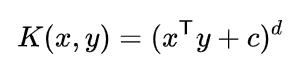

In [21]:
# we need to find components for the polynomial kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,99.874922,-5.00000,0,9975.000000,25.000000,-499.374609
1,99.879927,-4.89899,0,9975.999898,24.000102,-489.310755
2,99.884831,-4.79798,0,9976.979390,23.020610,-479.245399
3,99.889631,-4.69697,0,9977.938476,22.061524,-469.178572
4,99.894330,-4.59596,0,9978.877155,21.122845,-459.110304


In [25]:
# independent and dependent features
X = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df['Y']

In [23]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=0)

In [27]:
X_train

,X1,X2,X1_square,X2_square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,99.990702,1.363636,9998.140496,1.859504,136.350957
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-99.995396,0.959596,9999.079176,0.920824,-95.955178
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-99.907811,4.292929,9981.570758,18.429242,-428.897170
117,-99.946101,-3.282828,9989.223038,10.776962,328.105886
47,99.999681,-0.252525,9999.936231,0.063769,-25.252445


In [28]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [37]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_square', y='X1_square', z='X1*X2', color='Y')
fig.show()

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0